<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/7%2C8%2C9%EA%B0%95_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%988%EA%B0%95_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EB%A1%9C_%EB%B6%93%EA%BD%83_%EC%A2%85%EB%A5%98_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능강의 8강: 의사결정트리로 붓꽃 종류 예측하기

## 데이터에 대한 설명
1. 꽃의 종류는 세토사, 버지칼라, 비기니카 이렇게 3개임. ->
 클래스는 Setosa, Versicolour, Virginica 세 가지
2. petal은 꽃잎이고, sepal은 꽃받침
3. 데이터셋에는 총 150개의 데이터가 담겨있다.
4. 각 데이터에는 4개의 정보(sepal,petal의 길이(length)와 폭(width))가 담겨있음.




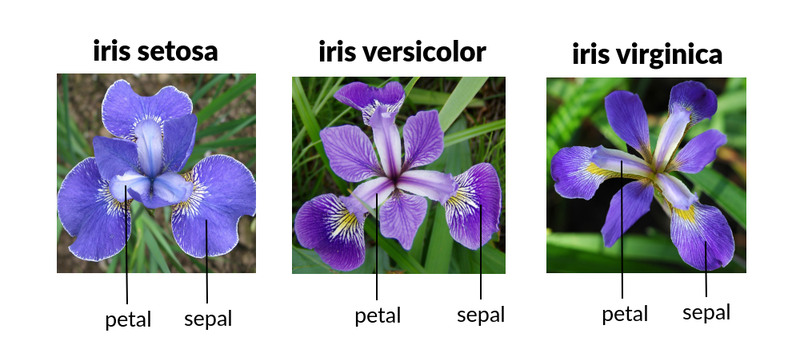

In [2]:
#임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
#붓꽃데이터 불러오기
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) #총 3가지 붓꽃(Setosa, Versicolour, Virginica )
df['flower']= iris.target

In [6]:
#데이터 확인
df.head()
#sepal 꽃받침, petal꽃잎, flower는 꽃종류

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#target확인하기
np.unique(df['flower']) #배열의 고유값 확인하기

array([0, 1, 2])

In [8]:
#input data, output data 정의
input = iris.data
output=df['flower'] #flower는 target임

In [9]:
#Train Set, Test Set분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(
    input,output)

In [18]:
#의사결정트리 만들기
from sklearn.tree import DecisionTreeClassifier, plot_tree
DT = DecisionTreeClassifier(max_depth=3) #여기서의 하이퍼파라미터는 max_depth가 된다.
#Root Node를 포함하여 해당 깊이까지의 노드들이 생성

In [19]:
#훈련시키기
DT.fit(train_input, train_output)

DecisionTreeClassifier(max_depth=3)

In [20]:
#성능평가
DT.score(test_input, test_output)

0.9736842105263158

[Text(0.375, 0.875, 'petal length (cm) <= 2.5\ngini = 0.665\nsamples = 112\nvalue = [34, 40, 38]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

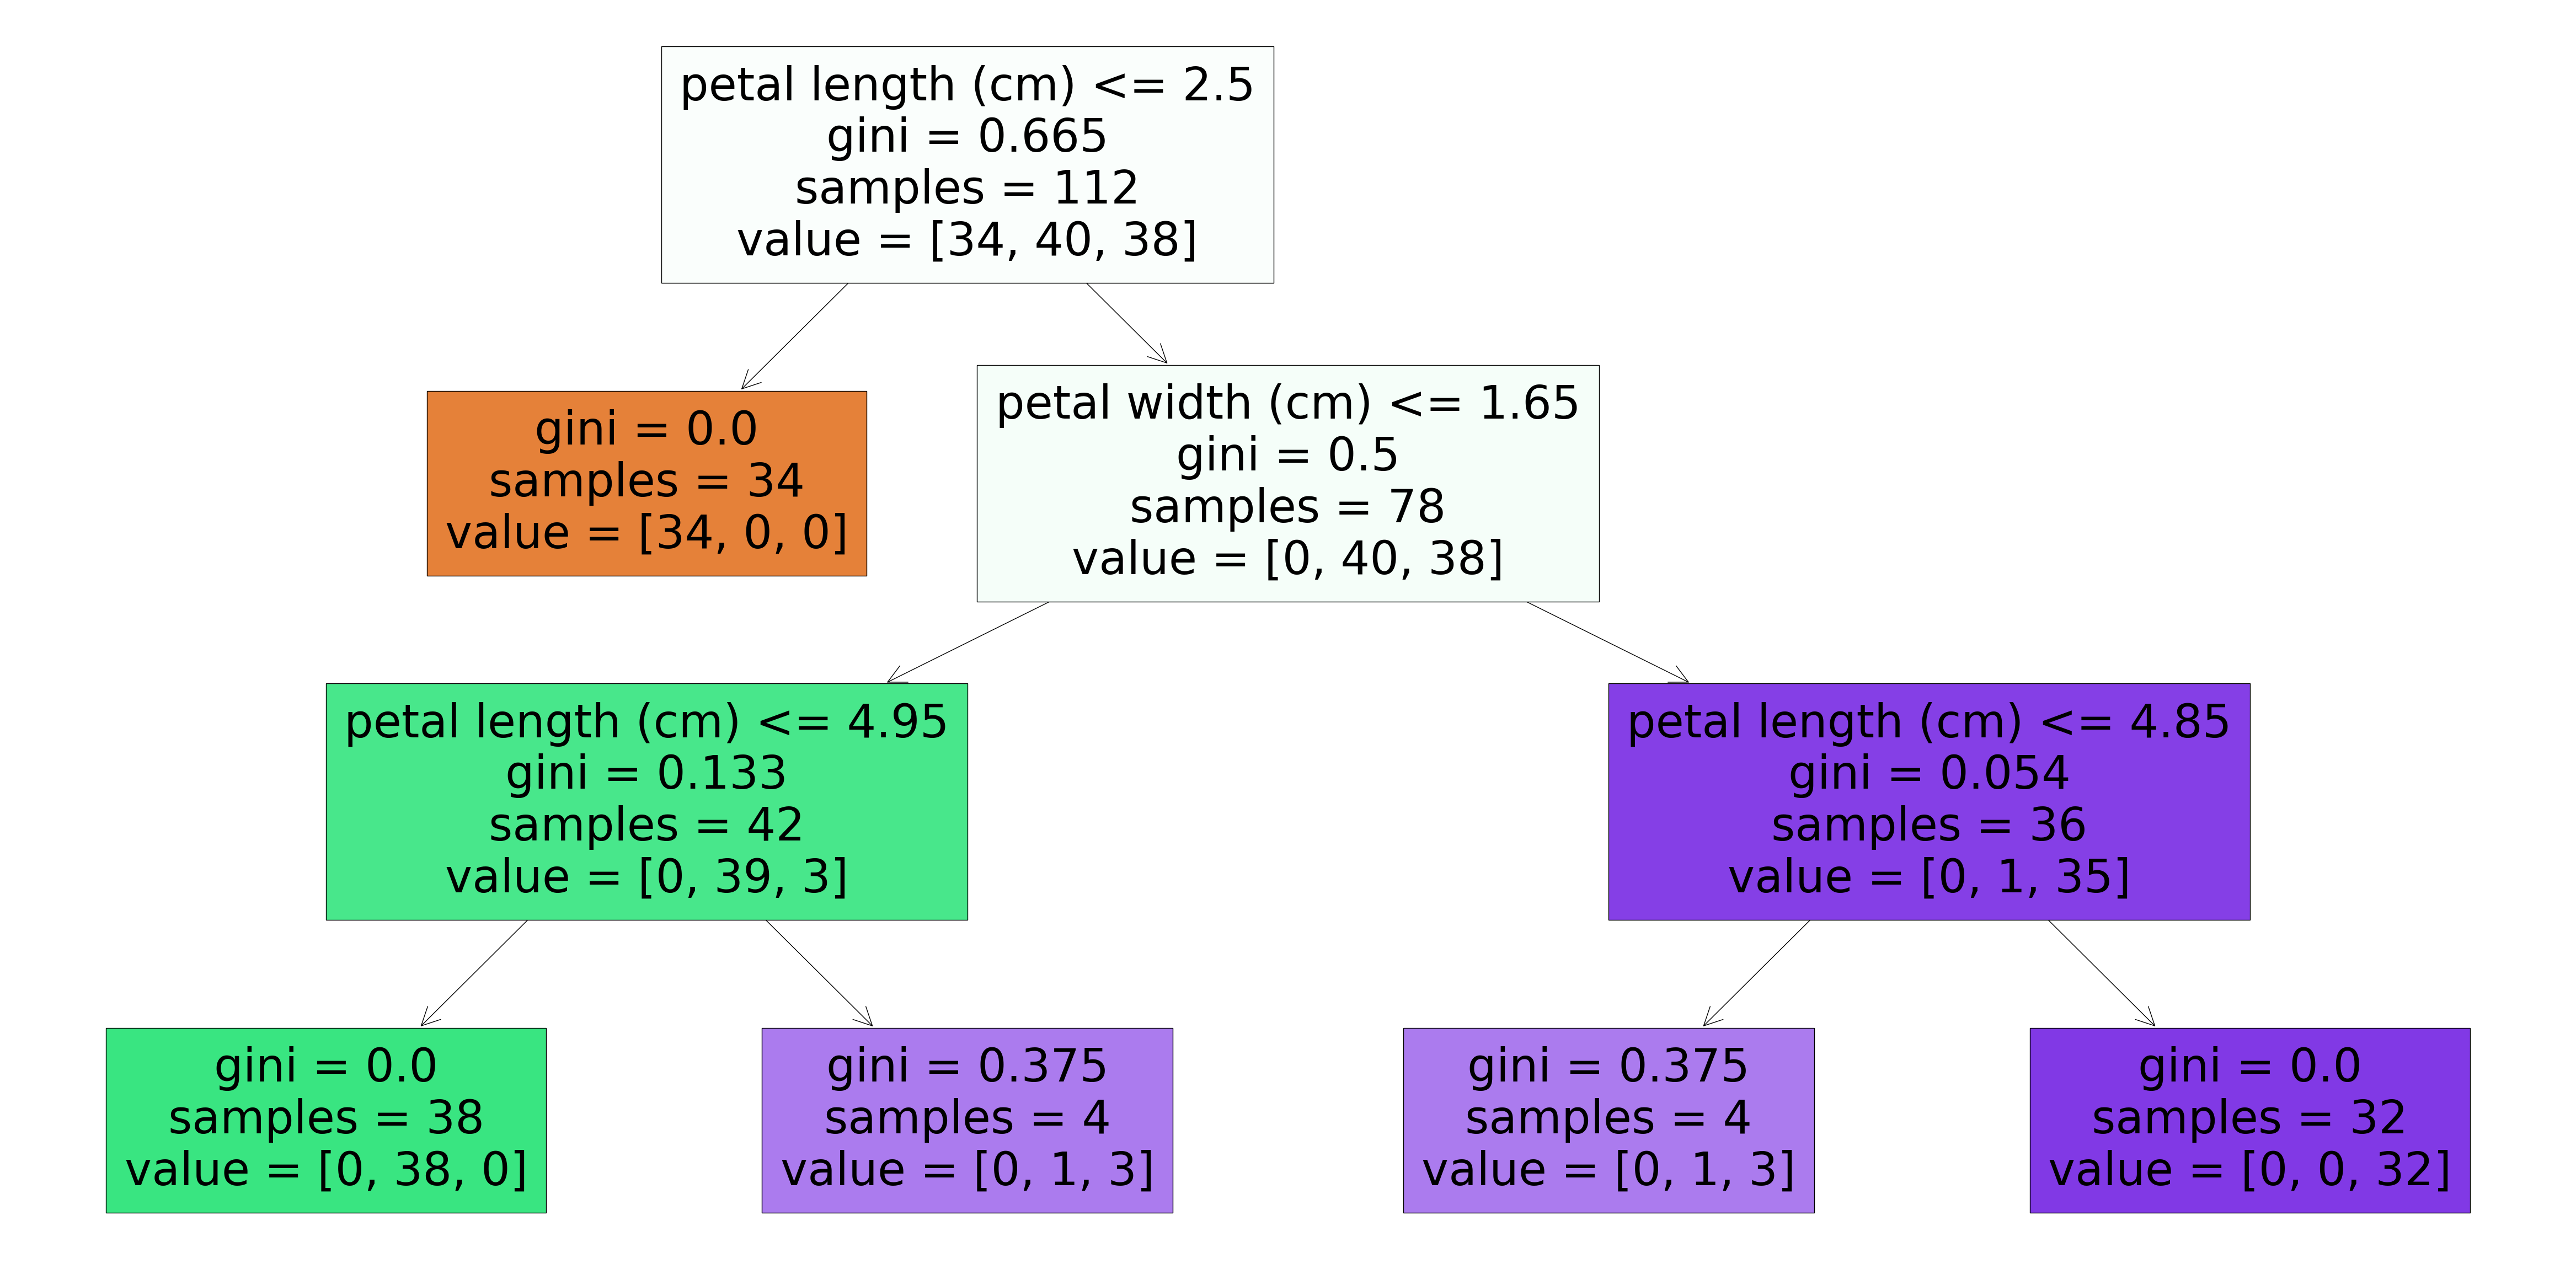

In [22]:
#시각화
plt.figure( figsize=(60,30))
plot_tree(DT, max_depth=3, filled=True, feature_names=iris.feature_names)

In [25]:
#하이퍼파라미터(max_depth)를 다르게 줘보기

DT2= DecisionTreeClassifier(max_depth=2)
DT3= DecisionTreeClassifier(max_depth=5)

In [29]:
# 조정된 하이퍼파라미터 훈련시키고 성능분석하기
DT2.fit(train_input, train_output)
DT3.fit(train_input, train_output)

DT2.score(test_input, test_output), DT3.score(test_input, test_output)

(0.9473684210526315, 0.9473684210526315)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [34, 40, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.054\nsamples = 36\nvalue = [0, 1, 35]')]

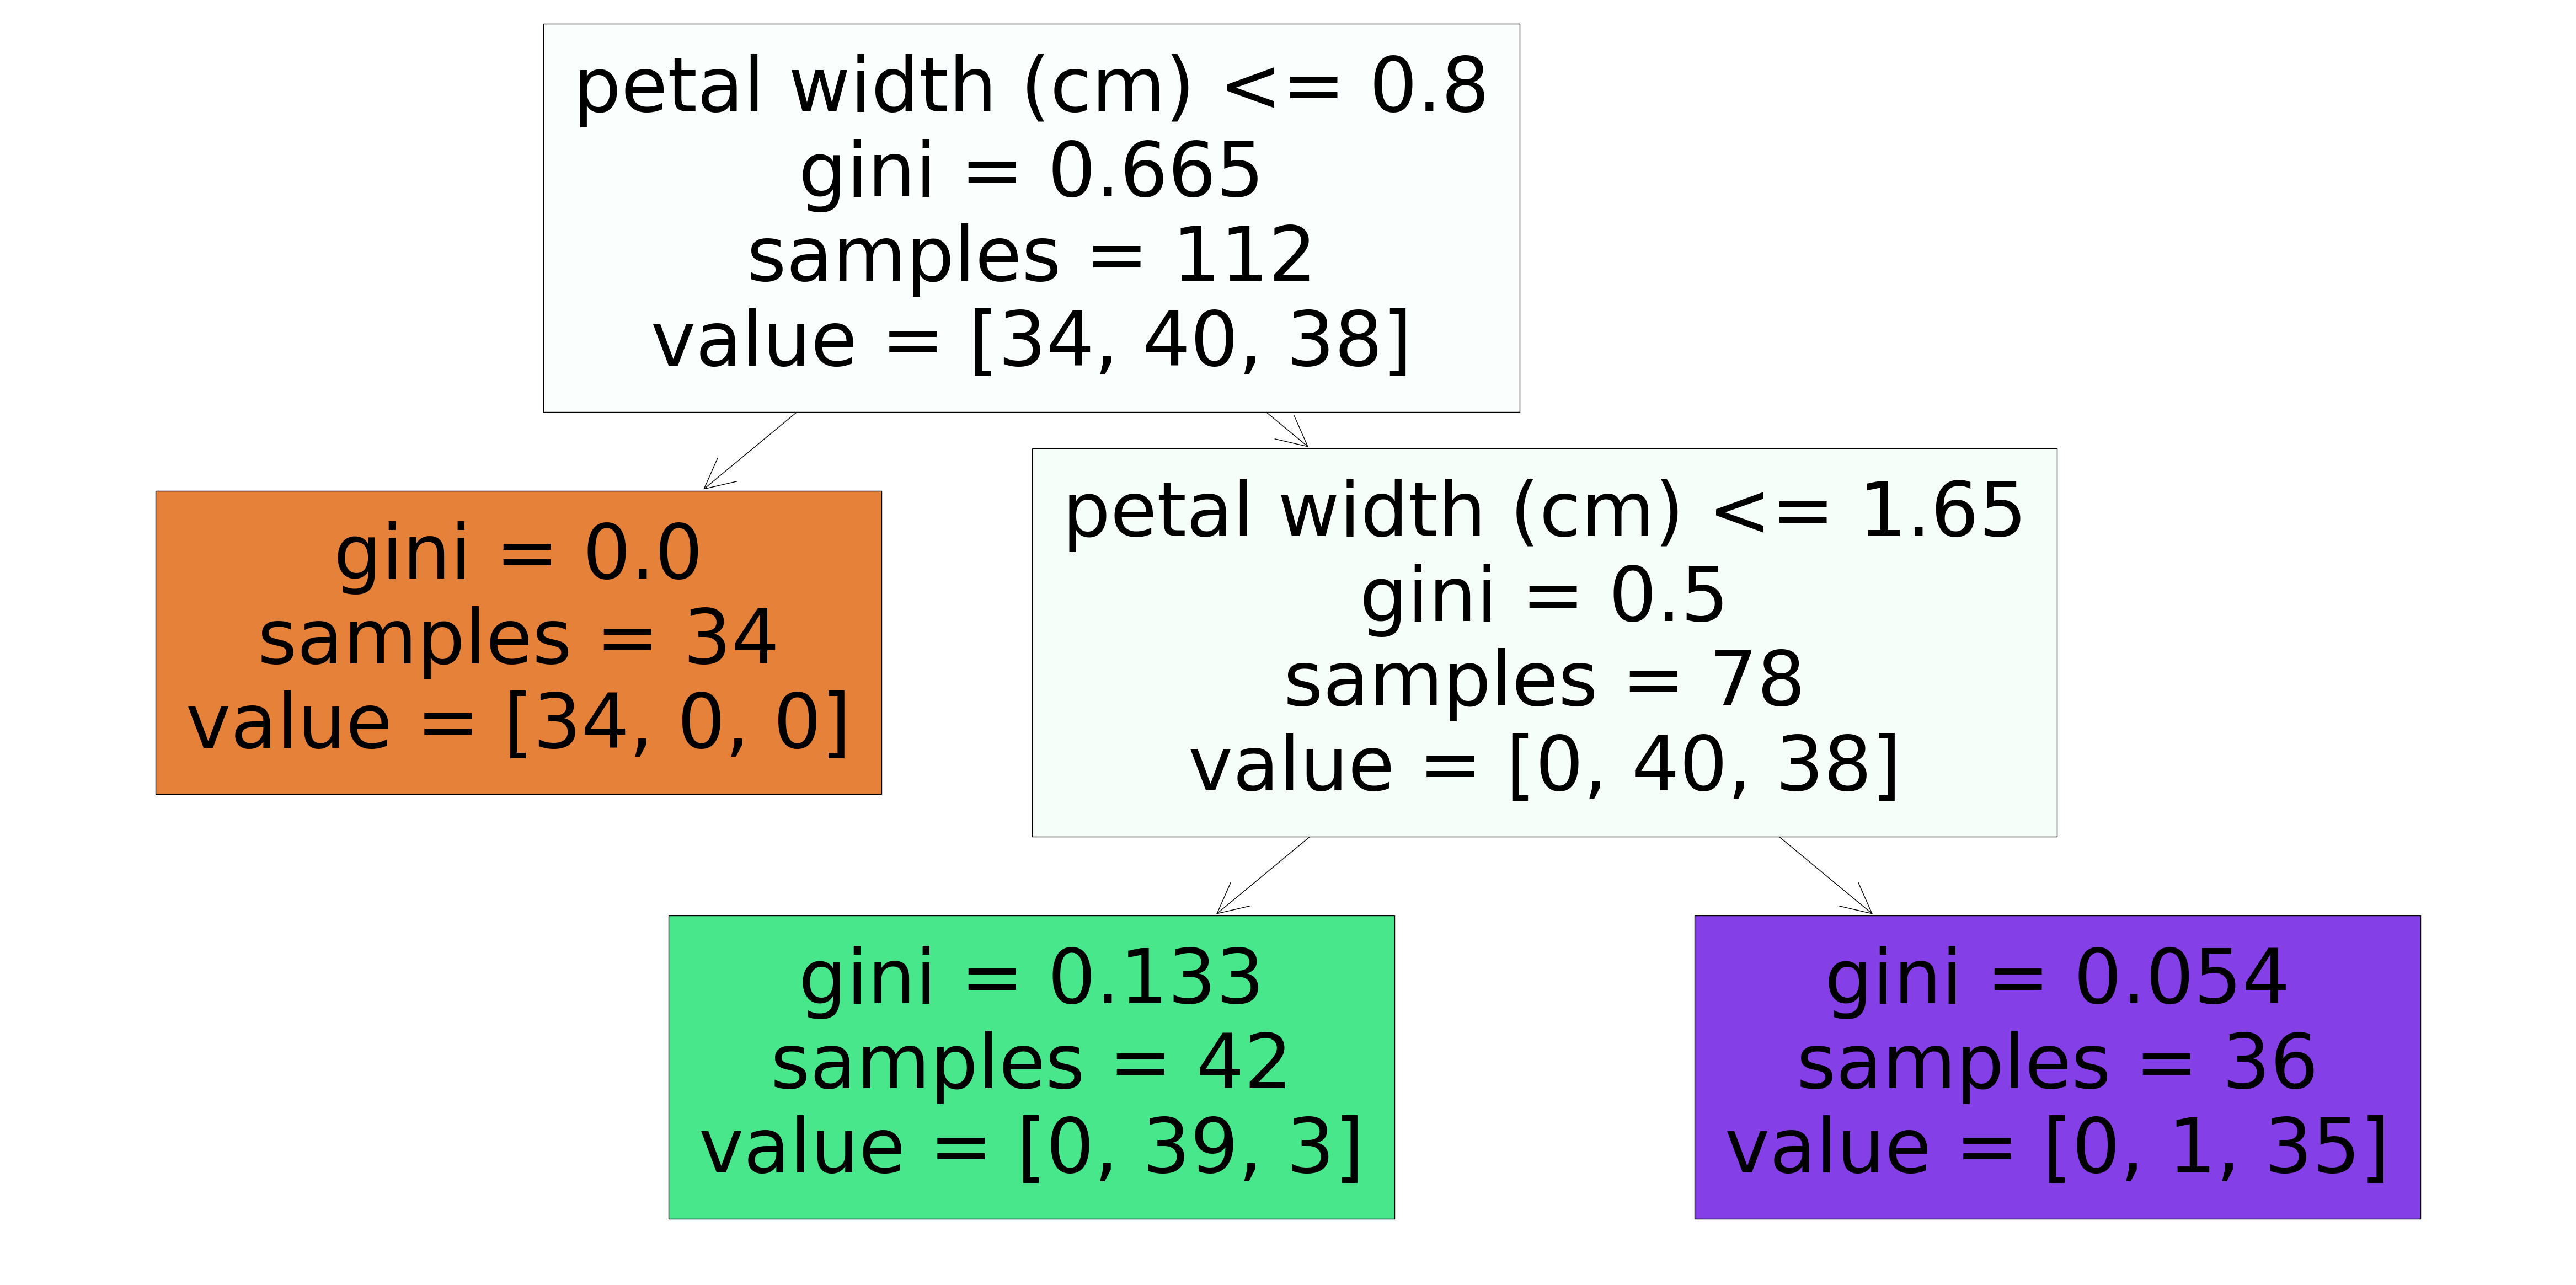

In [31]:
#조정된 하이퍼파라미터 DT2 그려보기
plt.figure( figsize=(60,30))
plot_tree(DT2, max_depth=2, filled=True, feature_names=iris.feature_names)

[Text(0.4, 0.9, 'petal length (cm) <= 2.5\ngini = 0.665\nsamples = 112\nvalue = [34, 40, 38]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.3, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]

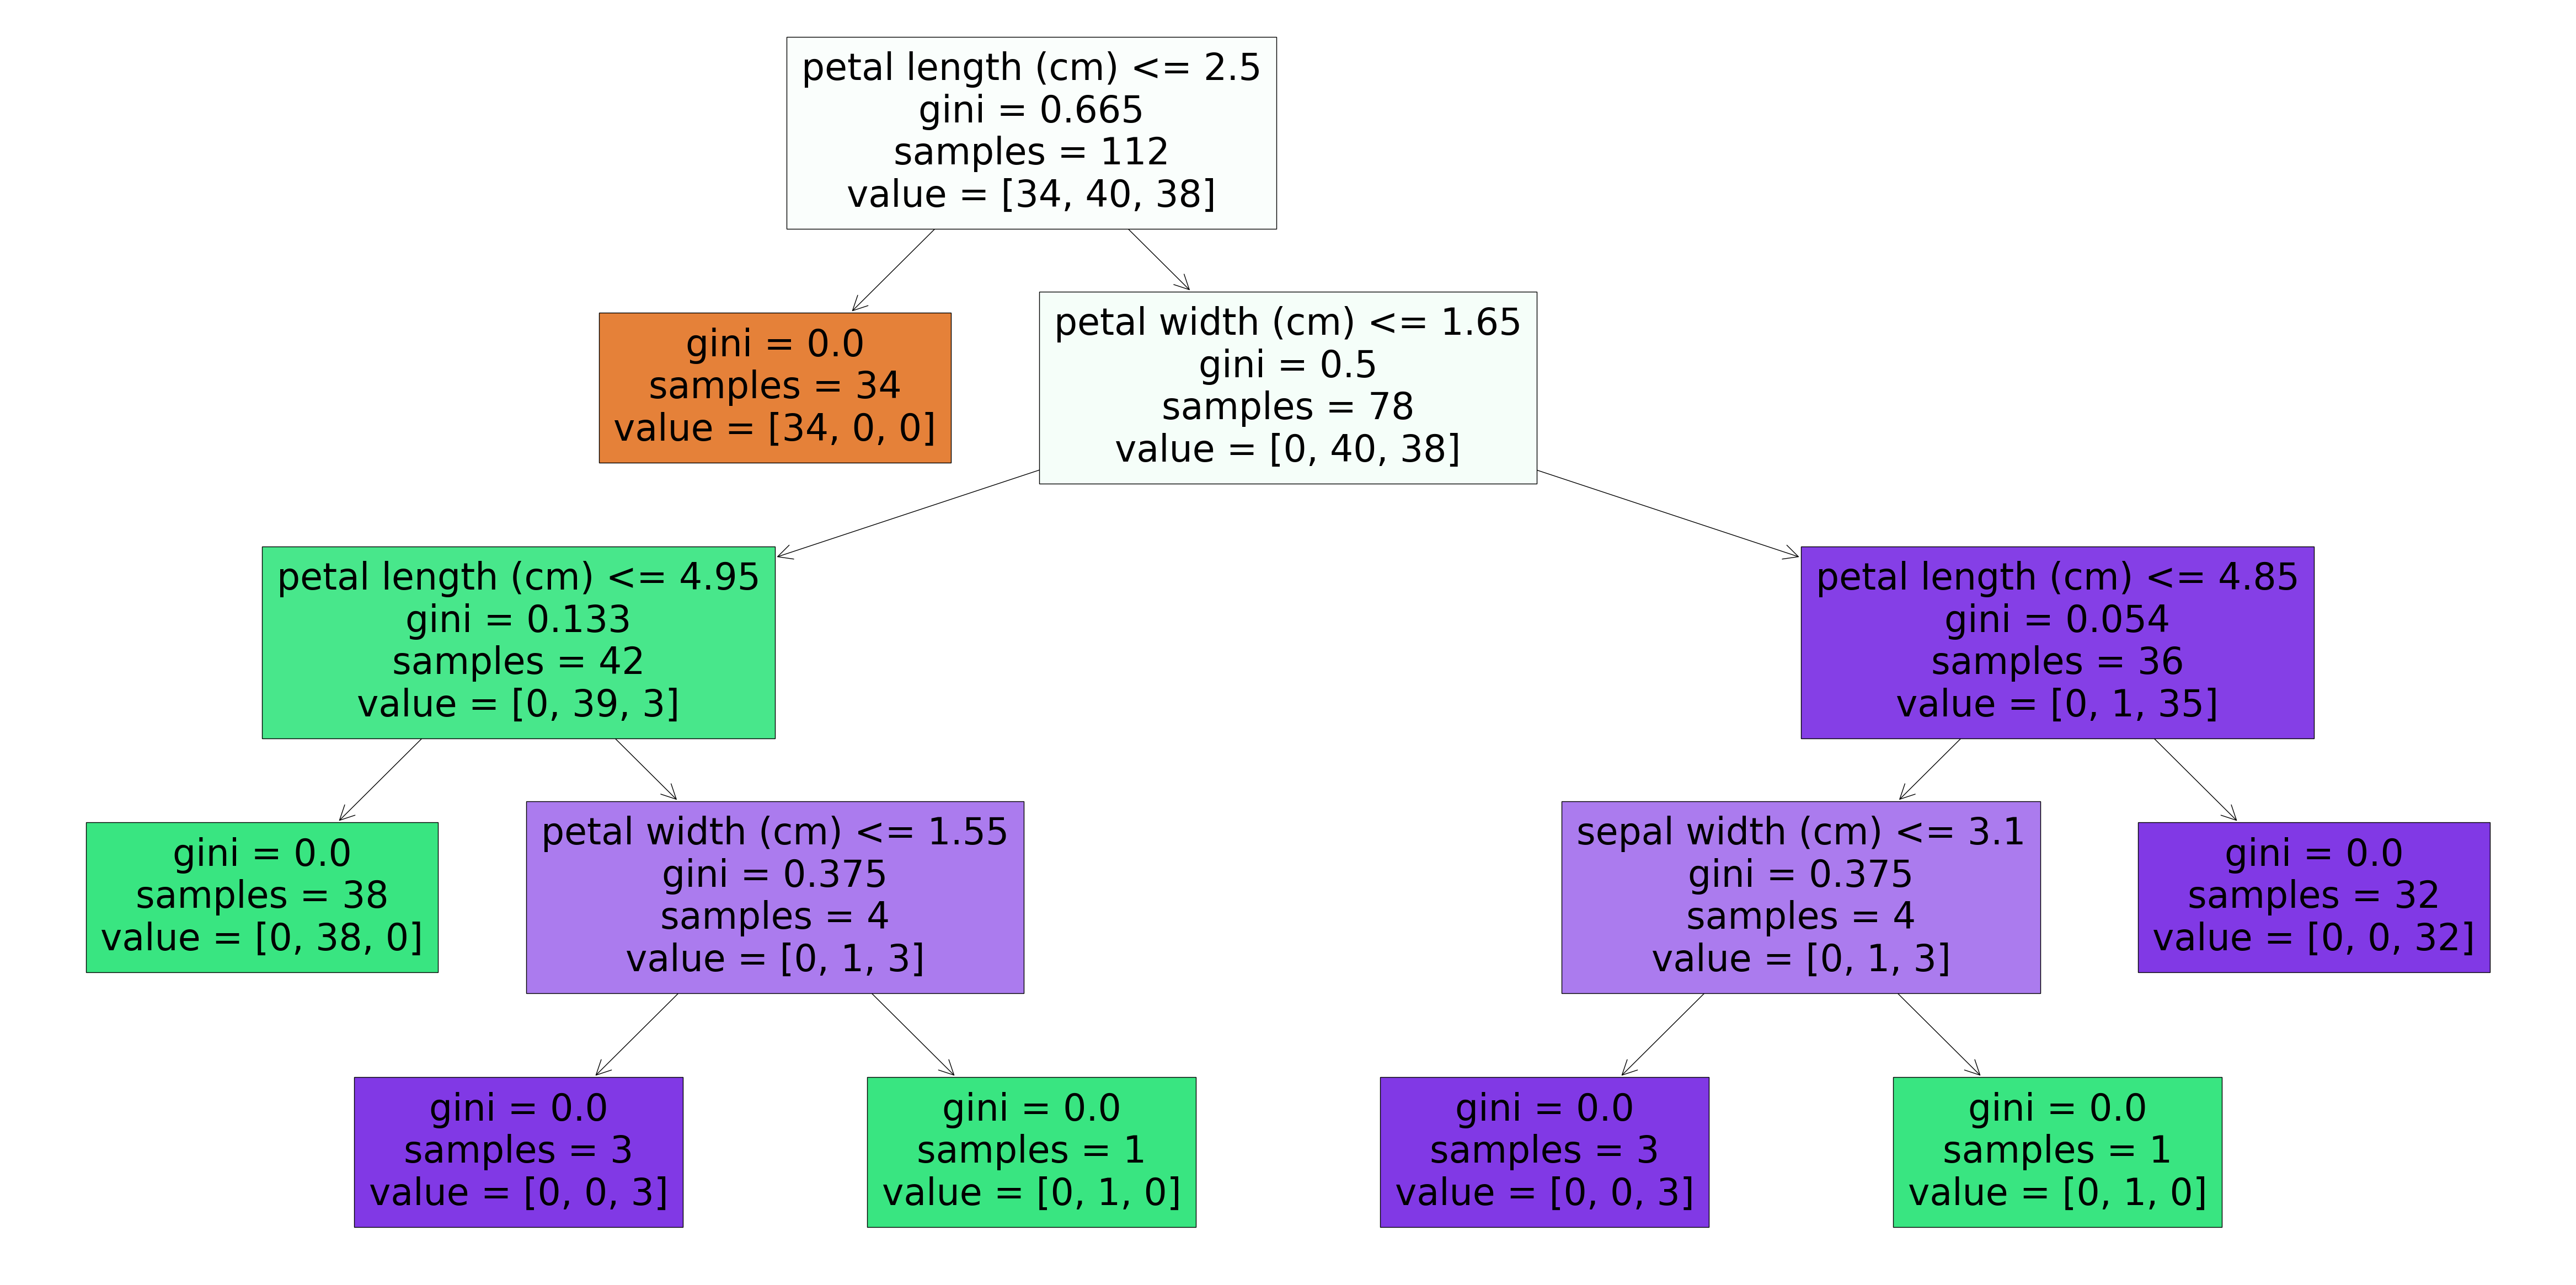

In [33]:
#조정된 하이퍼파라미터 DT3 그려보기
plt.figure( figsize=(60,30))
plot_tree(DT3, max_depth=5, filled=True, feature_names=iris.feature_names)

## 하이퍼파라미터 max_depth의 조절에 대해...

- max_depth를 높일수록 정확도가 높아질 수 있으나 어느정도 높아지다가 한계에 부딪힘. ->  why? 과적합 문제 때문에

- max_depth가 낮아지면 명확하고 과적합 문제에 약하지만 결론(정확도)자체가 낮아질 수 있다.

- 이 두가지 중에서 인간이 선택해야한다. 정답이 없음.

In [36]:
#아이리스의 특성(feature)의 이름보기
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
#특성의 기여도 확인하기
DT.feature_importances_
# 세 번째 배열: 'petal length (cm), 네 번째 배열'petal width (cm)
#결과에 대해서 어떻게 생각해야 하냐면
# sepal length (cm)', 'sepal width (cm)' 는 의사결정트리를 만드는데 있어서 기여도가 제로이다 라는 뜻

array([0.        , 0.        , 0.56002118, 0.43997882])

## 의사결정트리의 장단점

- 의사결정트리의 **단점 배경**: 근데 컴퓨터마다 다를 수 있다. 질문 자체가 지니계의 차이 즉, 정보게인을 최대화하기 위한 질문이므로 처음에는 배열이 랜덤하게 던져질 수 있기 때문에 컴퓨터마다 질문자체가 다를 수 있다. 그래서 성능은 비슷해도 결과는 완전 다를 수 있다. **이것이 의사결정트리의 단점**이다.

### 단점
1. 질문자체가 랜덤이기 때문에 할때마다 결과가 조금씩 달라질 수 있다.
2. 질문이 많아지면 과적합의 문제가 발생할 수 있다.

### 장점
1. 근거과 명확하다.
2. 중요도(importance)를 알 수 있다.
